In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [2]:
df = pd.read_csv('../data/train.csv')
df = pd.DataFrame(df,columns=[
    'habitaciones',
    'metroscubiertos',
    'metrostotales',
    'banos',
    'garages',
    'antiguedad',
    #'provincia',
    #'escuelascercanas',
    #'centroscomercialescercanos',
    'lat',
    'lng',
    'precio',
])
df = df.dropna()
df = df.reset_index()
df = df.drop(columns='index')
print(df.shape)

(58776, 9)


In [3]:
# PARTIMOS EL DATASET EN TRAIN Y TEST
y = df['precio'].values
X = df.drop(columns='precio')

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [4]:
# CHEQUEOS DE SHAPE
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(41143,)
(17633,)
(41143, 8)
(17633, 8)


In [28]:
# NORMALIZACION DE DATOS PARA QUE QUEDEN ENTRE 0 Y 1
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Propuestas de modelos de red neuronal

model1 = Sequential()
model1.add(Dense(8,activation='relu',use_bias=True))
model1.add(Dropout(0.5))
model1.add(Dense(8,activation='relu',use_bias=True))
model1.add(Dropout(0.5))
model1.add(Dense(3,activation='relu',use_bias=True))
model1.add(Dropout(0.5))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')


model2 = Sequential()
model2.add(Dense(8,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(3,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(3,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

model3 = Sequential()
model3.add(Dense(8,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(3,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

In [26]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 27        
_________________________________________________________________
dropout_7 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 4         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [7]:
#model1.fit(x=X_train,y=y_train,
          #validation_data=(X_test,y_test),
          #batch_size=64,epochs=500)

In [8]:
#model2.fit(x=X_train,y=y_train,
          #validation_data=(X_test,y_test),
          #batch_size=64,epochs=500)

In [9]:
model3.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=64,epochs=500)

Epoch 1/500
643/643 [==============================] - 1s 1ms/step - loss: 7717887934464.0000 - val_loss: 7973497733120.0000
Epoch 2/500
643/643 [==============================] - 1s 1ms/step - loss: 7716369596416.0000 - val_loss: 7970489368576.0000
Epoch 3/500
643/643 [==============================] - 1s 988us/step - loss: 7711449153536.0000 - val_loss: 7963353808896.0000
Epoch 4/500
643/643 [==============================] - 1s 988us/step - loss: 7701836857344.0000 - val_loss: 7951273164800.0000
Epoch 5/500
643/643 [==============================] - 1s 997us/step - loss: 7687889223680.0000 - val_loss: 7934142054400.0000
Epoch 6/500
643/643 [==============================] - 1s 1ms/step - loss: 7668169703424.0000 - val_loss: 7911284146176.0000
Epoch 7/500
643/643 [==============================] - 1s 1ms/step - loss: 7642752221184.0000 - val_loss: 7882263232512.0000
Epoch 8/500
643/643 [==============================] - 1s 996us/step - loss: 7611269775360.0000 - val_loss: 78469985730

643/643 [==============================] - 1s 1ms/step - loss: 4248451416064.0000 - val_loss: 3124392099840.0000
Epoch 66/500
643/643 [==============================] - 1s 988us/step - loss: 4261627559936.0000 - val_loss: 3123008503808.0000
Epoch 67/500
643/643 [==============================] - 1s 1ms/step - loss: 4253131472896.0000 - val_loss: 3120679616512.0000
Epoch 68/500
643/643 [==============================] - 1s 1ms/step - loss: 4276409073664.0000 - val_loss: 3117719748608.0000
Epoch 69/500
643/643 [==============================] - 1s 1ms/step - loss: 4274333679616.0000 - val_loss: 3122729844736.0000
Epoch 70/500
643/643 [==============================] - 1s 1ms/step - loss: 4280853987328.0000 - val_loss: 3124507967488.0000
Epoch 71/500
643/643 [==============================] - 1s 1ms/step - loss: 4291984097280.0000 - val_loss: 3119547416576.0000
Epoch 72/500
643/643 [==============================] - 1s 1ms/step - loss: 4226594111488.0000 - val_loss: 3104175554560.0000
Epo

643/643 [==============================] - 1s 1ms/step - loss: 4145120018432.0000 - val_loss: 2959990587392.0000
Epoch 130/500
643/643 [==============================] - 1s 1ms/step - loss: 4145376395264.0000 - val_loss: 2958653390848.0000
Epoch 131/500
643/643 [==============================] - 1s 1ms/step - loss: 4162663219200.0000 - val_loss: 2958570815488.0000
Epoch 132/500
643/643 [==============================] - 1s 1ms/step - loss: 4096753139712.0000 - val_loss: 2953887612928.0000
Epoch 133/500
643/643 [==============================] - 1s 1ms/step - loss: 4109557563392.0000 - val_loss: 2949172428800.0000
Epoch 134/500
643/643 [==============================] - 1s 1ms/step - loss: 4120454103040.0000 - val_loss: 2941519396864.0000
Epoch 135/500
643/643 [==============================] - 1s 1ms/step - loss: 4101640552448.0000 - val_loss: 2937680297984.0000
Epoch 136/500
643/643 [==============================] - 1s 1ms/step - loss: 4089770147840.0000 - val_loss: 2933525315584.000

643/643 [==============================] - 1s 1ms/step - loss: 4040039333888.0000 - val_loss: 2848878755840.0000
Epoch 194/500
643/643 [==============================] - 1s 1ms/step - loss: 4051980517376.0000 - val_loss: 2846571364352.0000
Epoch 195/500
643/643 [==============================] - 1s 1ms/step - loss: 4105795796992.0000 - val_loss: 2851787505664.0000
Epoch 196/500
643/643 [==============================] - 1s 1ms/step - loss: 4059010695168.0000 - val_loss: 2853107662848.0000
Epoch 197/500
643/643 [==============================] - 1s 1ms/step - loss: 4045693517824.0000 - val_loss: 2853939707904.0000
Epoch 198/500
643/643 [==============================] - 1s 1ms/step - loss: 4039164559360.0000 - val_loss: 2847877627904.0000
Epoch 199/500
643/643 [==============================] - 1s 1ms/step - loss: 4070127960064.0000 - val_loss: 2847281512448.0000
Epoch 200/500
643/643 [==============================] - 1s 1ms/step - loss: 4047970238464.0000 - val_loss: 2848033603584.000

643/643 [==============================] - 1s 1ms/step - loss: 4024750571520.0000 - val_loss: 2791524270080.0000
Epoch 258/500
643/643 [==============================] - 1s 991us/step - loss: 4071057784832.0000 - val_loss: 2795568365568.0000
Epoch 259/500
643/643 [==============================] - 1s 1ms/step - loss: 4014787526656.0000 - val_loss: 2793152446464.0000
Epoch 260/500
643/643 [==============================] - 1s 999us/step - loss: 4068966662144.0000 - val_loss: 2796248367104.0000
Epoch 261/500
643/643 [==============================] - 1s 982us/step - loss: 4031599607808.0000 - val_loss: 2800365600768.0000
Epoch 262/500
643/643 [==============================] - 1s 1ms/step - loss: 4011454889984.0000 - val_loss: 2791988264960.0000
Epoch 263/500
643/643 [==============================] - 1s 1ms/step - loss: 3983096938496.0000 - val_loss: 2792138473472.0000
Epoch 264/500
643/643 [==============================] - 1s 925us/step - loss: 4032037650432.0000 - val_loss: 279781126

Epoch 321/500
643/643 [==============================] - 1s 1ms/step - loss: 3996657385472.0000 - val_loss: 2774216474624.0000
Epoch 322/500
643/643 [==============================] - 1s 1ms/step - loss: 4043891802112.0000 - val_loss: 2772102021120.0000
Epoch 323/500
643/643 [==============================] - 1s 1ms/step - loss: 4015520743424.0000 - val_loss: 2773344059392.0000
Epoch 324/500
643/643 [==============================] - 1s 939us/step - loss: 4012523126784.0000 - val_loss: 2772722515968.0000
Epoch 325/500
643/643 [==============================] - 1s 1ms/step - loss: 3983771697152.0000 - val_loss: 2766787575808.0000
Epoch 326/500
643/643 [==============================] - 1s 1ms/step - loss: 4048445767680.0000 - val_loss: 2765255344128.0000
Epoch 327/500
643/643 [==============================] - 1s 882us/step - loss: 3990095396864.0000 - val_loss: 2757658935296.0000
Epoch 328/500
643/643 [==============================] - 1s 854us/step - loss: 4030804525056.0000 - val_los

643/643 [==============================] - 1s 1ms/step - loss: 4018098929664.0000 - val_loss: 2745455083520.0000
Epoch 386/500
643/643 [==============================] - 1s 1ms/step - loss: 4066001813504.0000 - val_loss: 2752009732096.0000
Epoch 387/500
643/643 [==============================] - 1s 1ms/step - loss: 3961711755264.0000 - val_loss: 2749567336448.0000
Epoch 388/500
643/643 [==============================] - 1s 1ms/step - loss: 4018701860864.0000 - val_loss: 2756349263872.0000
Epoch 389/500
643/643 [==============================] - 1s 1ms/step - loss: 4019481477120.0000 - val_loss: 2763075616768.0000
Epoch 390/500
643/643 [==============================] - 1s 805us/step - loss: 3998666981376.0000 - val_loss: 2760215625728.0000
Epoch 391/500
643/643 [==============================] - 1s 923us/step - loss: 4004537171968.0000 - val_loss: 2757139103744.0000
Epoch 392/500
643/643 [==============================] - 1s 1ms/step - loss: 3960405229568.0000 - val_loss: 2758072860672

643/643 [==============================] - 1s 1ms/step - loss: 3951297298432.0000 - val_loss: 2724112891904.0000
Epoch 450/500
643/643 [==============================] - 1s 987us/step - loss: 3987699400704.0000 - val_loss: 2726780993536.0000
Epoch 451/500
643/643 [==============================] - 1s 974us/step - loss: 3999176589312.0000 - val_loss: 2730962976768.0000
Epoch 452/500
643/643 [==============================] - 1s 917us/step - loss: 3949427687424.0000 - val_loss: 2726621085696.0000
Epoch 453/500
643/643 [==============================] - 1s 823us/step - loss: 4035121774592.0000 - val_loss: 2734675984384.0000
Epoch 454/500
643/643 [==============================] - 1s 887us/step - loss: 4003784294400.0000 - val_loss: 2740243398656.0000
Epoch 455/500
643/643 [==============================] - 1s 986us/step - loss: 3991867490304.0000 - val_loss: 2738004426752.0000
Epoch 456/500
643/643 [==============================] - 1s 997us/step - loss: 4017684742144.0000 - val_loss: 273

In [10]:
losses3 = pd.DataFrame(model3.history.history)
#losses2 = pd.DataFrame(model2.history.history)
#losses1 = pd.DataFrame(model1.history.history)

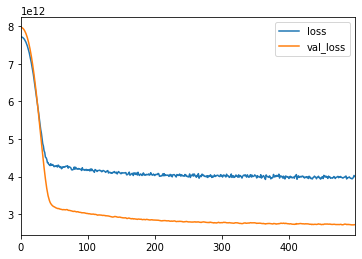

In [11]:
#losses1.plot()
#losses2.plot()
losses3.plot()

In [12]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
#predictions1 = model1.predict(X_test)
#predictions2 = model2.predict(X_test)
predictions3 = model3.predict(X_test)
#print('Error model 1:',np.sqrt(mean_squared_error(y_test,predictions1)))
#print('Error model 2:',np.sqrt(mean_squared_error(y_test,predictions2)))
print('RMSE model 3:',np.sqrt(mean_squared_error(y_test,predictions3)))

Error model 3: 1651028.215103782


In [20]:
# OPTIMIZACION DEL MODELO GANADOR
model3.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=32,epochs=1000)

Epoch 1/1000
1286/1286 [==============================] - 1s 934us/step - loss: 3862151036928.0000 - val_loss: 2653782540288.0000
Epoch 2/1000
1286/1286 [==============================] - 1s 1ms/step - loss: 3896946196480.0000 - val_loss: 2650993852416.0000
Epoch 3/1000
1286/1286 [==============================] - 1s 990us/step - loss: 3926633480192.0000 - val_loss: 2652189229056.0000
Epoch 4/1000
1286/1286 [==============================] - 1s 961us/step - loss: 3845870583808.0000 - val_loss: 2637496320000.0000
Epoch 5/1000
1286/1286 [==============================] - 1s 1ms/step - loss: 3922681921536.0000 - val_loss: 2646330048512.0000
Epoch 6/1000
1286/1286 [==============================] - 1s 995us/step - loss: 3869263003648.0000 - val_loss: 2644429766656.0000
Epoch 7/1000
1286/1286 [==============================] - 1s 958us/step - loss: 3876823236608.0000 - val_loss: 2649683656704.0000
Epoch 8/1000
1286/1286 [==============================] - 1s 967us/step - loss: 3856727277568.

Epoch 64/1000
1286/1286 [==============================] - 1s 999us/step - loss: 3875178020864.0000 - val_loss: 2645146206208.0000
Epoch 65/1000
1286/1286 [==============================] - 1s 891us/step - loss: 3866400391168.0000 - val_loss: 2636053741568.0000
Epoch 66/1000
1286/1286 [==============================] - 1s 933us/step - loss: 3924343914496.0000 - val_loss: 2633180905472.0000
Epoch 67/1000
1286/1286 [==============================] - 1s 1ms/step - loss: 3900125478912.0000 - val_loss: 2641424285696.0000
Epoch 68/1000
1286/1286 [==============================] - 1s 994us/step - loss: 3879193018368.0000 - val_loss: 2633429942272.0000
Epoch 69/1000
1286/1286 [==============================] - 1s 1ms/step - loss: 3880691695616.0000 - val_loss: 2633190604800.0000
Epoch 70/1000
1286/1286 [==============================] - 1s 978us/step - loss: 3867068596224.0000 - val_loss: 2638157709312.0000
Epoch 71/1000
1286/1286 [==============================] - 1s 984us/step - loss: 393333

Epoch 127/1000
1286/1286 [==============================] - 1s 994us/step - loss: 3904585859072.0000 - val_loss: 2634946707456.0000
Epoch 128/1000
1286/1286 [==============================] - 1s 955us/step - loss: 3924440645632.0000 - val_loss: 2640957407232.0000
Epoch 129/1000
1286/1286 [==============================] - 1s 862us/step - loss: 3818592665600.0000 - val_loss: 2621707386880.0000
Epoch 130/1000
1286/1286 [==============================] - 1s 1ms/step - loss: 3871315591168.0000 - val_loss: 2615523147776.0000
Epoch 131/1000
1286/1286 [==============================] - 1s 987us/step - loss: 3920904847360.0000 - val_loss: 2630332186624.0000
Epoch 132/1000
1286/1286 [==============================] - 1s 1ms/step - loss: 3891370131456.0000 - val_loss: 2635276222464.0000
Epoch 133/1000
1286/1286 [==============================] - 1s 1ms/step - loss: 3835400552448.0000 - val_loss: 2628407787520.0000
Epoch 134/1000
1286/1286 [==============================] - 1s 1ms/step - loss: 38

1286/1286 [==============================] - 1s 975us/step - loss: 3876476420096.0000 - val_loss: 2640896065536.0000
Epoch 190/1000
1286/1286 [==============================] - 1s 1ms/step - loss: 3870437408768.0000 - val_loss: 2635864473600.0000
Epoch 191/1000
1286/1286 [==============================] - 1s 981us/step - loss: 3866181763072.0000 - val_loss: 2626067103744.0000
Epoch 192/1000
1286/1286 [==============================] - 1s 786us/step - loss: 3845832048640.0000 - val_loss: 2627403251712.0000
Epoch 193/1000
1286/1286 [==============================] - 1s 976us/step - loss: 3854246084608.0000 - val_loss: 2621785243648.0000
Epoch 194/1000
1286/1286 [==============================] - 1s 1ms/step - loss: 3873632157696.0000 - val_loss: 2632812855296.0000
Epoch 195/1000
1286/1286 [==============================] - 1s 986us/step - loss: 3885904953344.0000 - val_loss: 2628987387904.0000
Epoch 196/1000
1286/1286 [==============================] - 1s 953us/step - loss: 3888969416704

1286/1286 [==============================] - 1s 973us/step - loss: 3829972074496.0000 - val_loss: 2609164320768.0000
Epoch 252/1000
1286/1286 [==============================] - 1s 976us/step - loss: 3836481896448.0000 - val_loss: 2618760101888.0000
Epoch 253/1000
1286/1286 [==============================] - 1s 946us/step - loss: 3860668088320.0000 - val_loss: 2621269344256.0000
Epoch 254/1000
1286/1286 [==============================] - 1s 952us/step - loss: 3923545161728.0000 - val_loss: 2629037195264.0000
Epoch 255/1000
1286/1286 [==============================] - 1s 963us/step - loss: 3852052201472.0000 - val_loss: 2625346469888.0000
Epoch 256/1000
1286/1286 [==============================] - 1s 910us/step - loss: 3861488599040.0000 - val_loss: 2622720311296.0000
Epoch 257/1000
1286/1286 [==============================] - 1s 875us/step - loss: 3917359611904.0000 - val_loss: 2629906726912.0000
Epoch 258/1000
1286/1286 [==============================] - 1s 926us/step - loss: 386730714

1286/1286 [==============================] - 1s 820us/step - loss: 3828640120832.0000 - val_loss: 2601719955456.0000
Epoch 314/1000
1286/1286 [==============================] - 1s 999us/step - loss: 3847913209856.0000 - val_loss: 2605689602048.0000
Epoch 315/1000
1286/1286 [==============================] - 1s 989us/step - loss: 3872760528896.0000 - val_loss: 2613530853376.0000
Epoch 316/1000
1286/1286 [==============================] - 1s 1ms/step - loss: 3842190606336.0000 - val_loss: 2624196968448.0000
Epoch 317/1000
1286/1286 [==============================] - 1s 978us/step - loss: 3859724107776.0000 - val_loss: 2624614301696.0000
Epoch 318/1000
1286/1286 [==============================] - 1s 974us/step - loss: 3846774194176.0000 - val_loss: 2610864848896.0000
Epoch 319/1000
1286/1286 [==============================] - 1s 1ms/step - loss: 3810446802944.0000 - val_loss: 2604379406336.0000
Epoch 320/1000
1286/1286 [==============================] - 1s 966us/step - loss: 3868413657088

1286/1286 [==============================] - 1s 968us/step - loss: 3813648629760.0000 - val_loss: 2604569460736.0000
Epoch 376/1000
1286/1286 [==============================] - 1s 997us/step - loss: 3864061280256.0000 - val_loss: 2607066120192.0000
Epoch 377/1000
1286/1286 [==============================] - 1s 888us/step - loss: 3858228838400.0000 - val_loss: 2609002577920.0000
Epoch 378/1000
1286/1286 [==============================] - 1s 830us/step - loss: 3852621316096.0000 - val_loss: 2610151817216.0000
Epoch 379/1000
1286/1286 [==============================] - 1s 1ms/step - loss: 3889129324544.0000 - val_loss: 2614752182272.0000
Epoch 380/1000
1286/1286 [==============================] - 1s 1ms/step - loss: 3794031869952.0000 - val_loss: 2610005278720.0000
Epoch 381/1000
1286/1286 [==============================] - 1s 977us/step - loss: 3847389970432.0000 - val_loss: 2612279640064.0000
Epoch 382/1000
1286/1286 [==============================] - 1s 995us/step - loss: 3804622225408

1286/1286 [==============================] - 1s 969us/step - loss: 3819351310336.0000 - val_loss: 2602855301120.0000
Epoch 438/1000
1286/1286 [==============================] - 1s 945us/step - loss: 3810535407616.0000 - val_loss: 2600020475904.0000
Epoch 439/1000
1286/1286 [==============================] - 1s 992us/step - loss: 3859298648064.0000 - val_loss: 2612292485120.0000
Epoch 440/1000
1286/1286 [==============================] - 1s 994us/step - loss: 3823058812928.0000 - val_loss: 2607690022912.0000
Epoch 441/1000
1286/1286 [==============================] - 1s 979us/step - loss: 3828765687808.0000 - val_loss: 2612032962560.0000
Epoch 442/1000
1286/1286 [==============================] - 1s 892us/step - loss: 3833017139200.0000 - val_loss: 2609239818240.0000
Epoch 443/1000
1286/1286 [==============================] - 1s 871us/step - loss: 3827717636096.0000 - val_loss: 2608328081408.0000
Epoch 444/1000
1286/1286 [==============================] - 1s 926us/step - loss: 383921658

1286/1286 [==============================] - 1s 878us/step - loss: 3822150746112.0000 - val_loss: 2596516921344.0000
Epoch 500/1000
1286/1286 [==============================] - 1s 972us/step - loss: 3781745180672.0000 - val_loss: 2591174950912.0000
Epoch 501/1000
1286/1286 [==============================] - 1s 960us/step - loss: 3830307356672.0000 - val_loss: 2590005002240.0000
Epoch 502/1000
1286/1286 [==============================] - 1s 1ms/step - loss: 3841124990976.0000 - val_loss: 2598298714112.0000
Epoch 503/1000
1286/1286 [==============================] - 1s 977us/step - loss: 3804888563712.0000 - val_loss: 2593783283712.0000
Epoch 504/1000
1286/1286 [==============================] - 1s 936us/step - loss: 3814901678080.0000 - val_loss: 2587948744704.0000
Epoch 505/1000
1286/1286 [==============================] - 1s 943us/step - loss: 3783942209536.0000 - val_loss: 2594329853952.0000
Epoch 506/1000
1286/1286 [==============================] - 1s 885us/step - loss: 38148605214

1286/1286 [==============================] - 1s 1ms/step - loss: 3770782318592.0000 - val_loss: 2569991094272.0000
Epoch 562/1000
1286/1286 [==============================] - 1s 995us/step - loss: 3763023904768.0000 - val_loss: 2566840647680.0000
Epoch 563/1000
1286/1286 [==============================] - 1s 824us/step - loss: 3803249115136.0000 - val_loss: 2568579448832.0000
Epoch 564/1000
1286/1286 [==============================] - 1s 938us/step - loss: 3780287397888.0000 - val_loss: 2572825657344.0000
Epoch 565/1000
1286/1286 [==============================] - 1s 918us/step - loss: 3757981827072.0000 - val_loss: 2569278586880.0000
Epoch 566/1000
1286/1286 [==============================] - 1s 997us/step - loss: 3786289709056.0000 - val_loss: 2564758962176.0000
Epoch 567/1000
1286/1286 [==============================] - 1s 950us/step - loss: 3834273857536.0000 - val_loss: 2568225554432.0000
Epoch 568/1000
1286/1286 [==============================] - 1s 979us/step - loss: 37844140687

1286/1286 [==============================] - 1s 991us/step - loss: 3776703889408.0000 - val_loss: 2575533867008.0000
Epoch 624/1000
1286/1286 [==============================] - 1s 949us/step - loss: 3785281765376.0000 - val_loss: 2571972640768.0000
Epoch 625/1000
1286/1286 [==============================] - 1s 975us/step - loss: 3769454821376.0000 - val_loss: 2583068672000.0000
Epoch 626/1000
1286/1286 [==============================] - 1s 995us/step - loss: 3752739733504.0000 - val_loss: 2577943494656.0000
Epoch 627/1000
1286/1286 [==============================] - 1s 962us/step - loss: 3767799644160.0000 - val_loss: 2580135018496.0000
Epoch 628/1000
1286/1286 [==============================] - 1s 906us/step - loss: 3828057636864.0000 - val_loss: 2578525716480.0000
Epoch 629/1000
1286/1286 [==============================] - 1s 855us/step - loss: 3781482512384.0000 - val_loss: 2584398266368.0000
Epoch 630/1000
1286/1286 [==============================] - 1s 972us/step - loss: 377949388

1286/1286 [==============================] - 1s 817us/step - loss: 3740420014080.0000 - val_loss: 2561959526400.0000
Epoch 686/1000
1286/1286 [==============================] - 1s 879us/step - loss: 3729983275008.0000 - val_loss: 2558617190400.0000
Epoch 687/1000
1286/1286 [==============================] - 1s 958us/step - loss: 3745860288512.0000 - val_loss: 2558437621760.0000
Epoch 688/1000
1286/1286 [==============================] - 1s 974us/step - loss: 3782073384960.0000 - val_loss: 2561138491392.0000
Epoch 689/1000
1286/1286 [==============================] - 1s 960us/step - loss: 3732208615424.0000 - val_loss: 2564468506624.0000
Epoch 690/1000
1286/1286 [==============================] - 1s 963us/step - loss: 3782982762496.0000 - val_loss: 2571038359552.0000
Epoch 691/1000
1286/1286 [==============================] - 1s 967us/step - loss: 3746087567360.0000 - val_loss: 2557734813696.0000
Epoch 692/1000
1286/1286 [==============================] - 1s 935us/step - loss: 373345589

1286/1286 [==============================] - 1s 979us/step - loss: 3721807265792.0000 - val_loss: 2571021058048.0000
Epoch 748/1000
1286/1286 [==============================] - 1s 976us/step - loss: 3748492738560.0000 - val_loss: 2575094775808.0000
Epoch 749/1000
1286/1286 [==============================] - 1s 998us/step - loss: 3771976646656.0000 - val_loss: 2575180234752.0000
Epoch 750/1000
1286/1286 [==============================] - 1s 953us/step - loss: 3761079058432.0000 - val_loss: 2573697810432.0000
Epoch 751/1000
1286/1286 [==============================] - 1s 798us/step - loss: 3760272179200.0000 - val_loss: 2564231266304.0000
Epoch 752/1000
1286/1286 [==============================] - 1s 944us/step - loss: 3730053005312.0000 - val_loss: 2562708996096.0000
Epoch 753/1000
1286/1286 [==============================] - 1s 994us/step - loss: 3756946358272.0000 - val_loss: 2560024379392.0000
Epoch 754/1000
1286/1286 [==============================] - 1s 963us/step - loss: 372185995

1286/1286 [==============================] - 1s 913us/step - loss: 3728062021632.0000 - val_loss: 2536549384192.0000
Epoch 810/1000
1286/1286 [==============================] - 1s 945us/step - loss: 3711984467968.0000 - val_loss: 2540684705792.0000
Epoch 811/1000
1286/1286 [==============================] - 1s 963us/step - loss: 3728008544256.0000 - val_loss: 2554172801024.0000
Epoch 812/1000
1286/1286 [==============================] - 1s 952us/step - loss: 3757887455232.0000 - val_loss: 2544888446976.0000
Epoch 813/1000
1286/1286 [==============================] - 1s 1ms/step - loss: 3744605667328.0000 - val_loss: 2538432626688.0000
Epoch 814/1000
1286/1286 [==============================] - 1s 1ms/step - loss: 3755448991744.0000 - val_loss: 2538418995200.0000
Epoch 815/1000
1286/1286 [==============================] - 1s 955us/step - loss: 3688238415872.0000 - val_loss: 2533970411520.0000
Epoch 816/1000
1286/1286 [==============================] - 1s 879us/step - loss: 3749668978688

1286/1286 [==============================] - 1s 983us/step - loss: 3676780625920.0000 - val_loss: 2530201567232.0000
Epoch 872/1000
1286/1286 [==============================] - 1s 1ms/step - loss: 3695544631296.0000 - val_loss: 2524669542400.0000
Epoch 873/1000
1286/1286 [==============================] - 1s 909us/step - loss: 3704476401664.0000 - val_loss: 2533545213952.0000
Epoch 874/1000
1286/1286 [==============================] - 1s 819us/step - loss: 3734825336832.0000 - val_loss: 2547474497536.0000
Epoch 875/1000
1286/1286 [==============================] - 1s 982us/step - loss: 3693233831936.0000 - val_loss: 2535239188480.0000
Epoch 876/1000
1286/1286 [==============================] - 1s 991us/step - loss: 3716949475328.0000 - val_loss: 2539467309056.0000
Epoch 877/1000
1286/1286 [==============================] - 1s 972us/step - loss: 3704556617728.0000 - val_loss: 2534559449088.0000
Epoch 878/1000
1286/1286 [==============================] - 1s 969us/step - loss: 37039969402

1286/1286 [==============================] - 1s 968us/step - loss: 3651151331328.0000 - val_loss: 2518701047808.0000
Epoch 934/1000
1286/1286 [==============================] - 1s 981us/step - loss: 3654898417664.0000 - val_loss: 2517279703040.0000
Epoch 935/1000
1286/1286 [==============================] - 1s 972us/step - loss: 3665424547840.0000 - val_loss: 2513232723968.0000
Epoch 936/1000
1286/1286 [==============================] - 1s 996us/step - loss: 3713586692096.0000 - val_loss: 2517832826880.0000
Epoch 937/1000
1286/1286 [==============================] - 1s 977us/step - loss: 3697427349504.0000 - val_loss: 2523682832384.0000
Epoch 938/1000
1286/1286 [==============================] - 1s 958us/step - loss: 3716733992960.0000 - val_loss: 2522241826816.0000
Epoch 939/1000
1286/1286 [==============================] - 1s 812us/step - loss: 3611343454208.0000 - val_loss: 2515728072704.0000
Epoch 940/1000
1286/1286 [==============================] - 1s 941us/step - loss: 370420534

1286/1286 [==============================] - 1s 995us/step - loss: 3631282651136.0000 - val_loss: 2516813086720.0000
Epoch 996/1000
1286/1286 [==============================] - 1s 966us/step - loss: 3685784485888.0000 - val_loss: 2518617948160.0000
Epoch 997/1000
1286/1286 [==============================] - 1s 783us/step - loss: 3686358319104.0000 - val_loss: 2522659684352.0000
Epoch 998/1000
1286/1286 [==============================] - 1s 973us/step - loss: 3667542409216.0000 - val_loss: 2519662067712.0000
Epoch 999/1000
1286/1286 [==============================] - 1s 973us/step - loss: 3667368607744.0000 - val_loss: 2508841549824.0000
Epoch 1000/1000
1286/1286 [==============================] - 1s 969us/step - loss: 3616949403648.0000 - val_loss: 2507176148992.0000


In [24]:
losses_final = pd.DataFrame(model3.history.history)

In [25]:
display(losses_final)

""


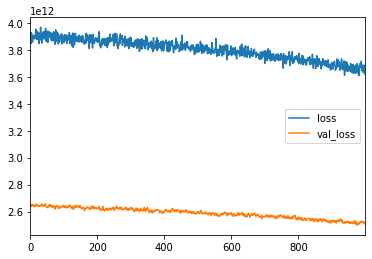

In [22]:
losses_final.plot()

In [23]:
predictions3 = model3.predict(X_test)
print('Final RMSE model 3:',np.sqrt(mean_squared_error(y_test,predictions3)))

Final RMSE model 3: 1583406.433588985
